1) Load CALIFORNIA-housing.csv and run a k-means with k=12 on the longitude and latitude columns. Create a scatter plot for longitude and latitude, coloring the nodes according to their class label. Compare boxplots across clusters for each descriptive numerical variable within the dataset. Run the algorithm multiple times and describe what you observe. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the sample data
california_housing = pd.read_csv('./Files/CALIFORNIA-housing.csv')

california_housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


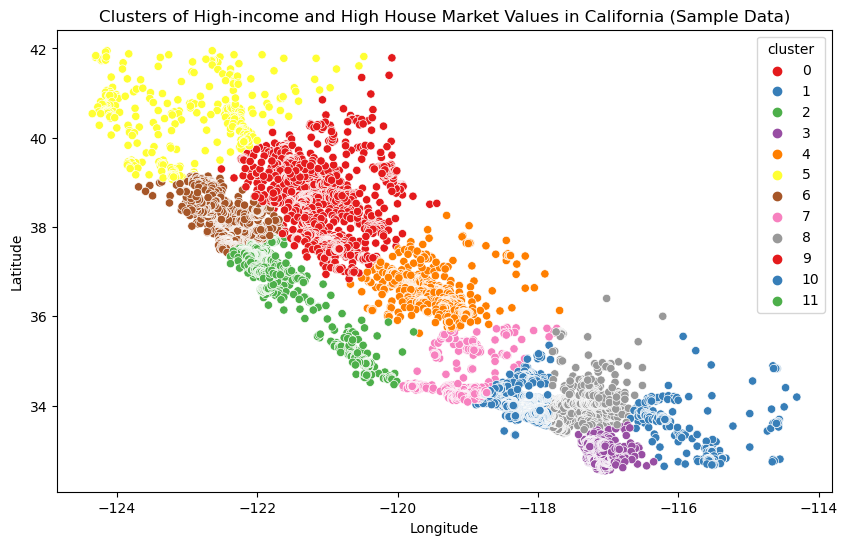

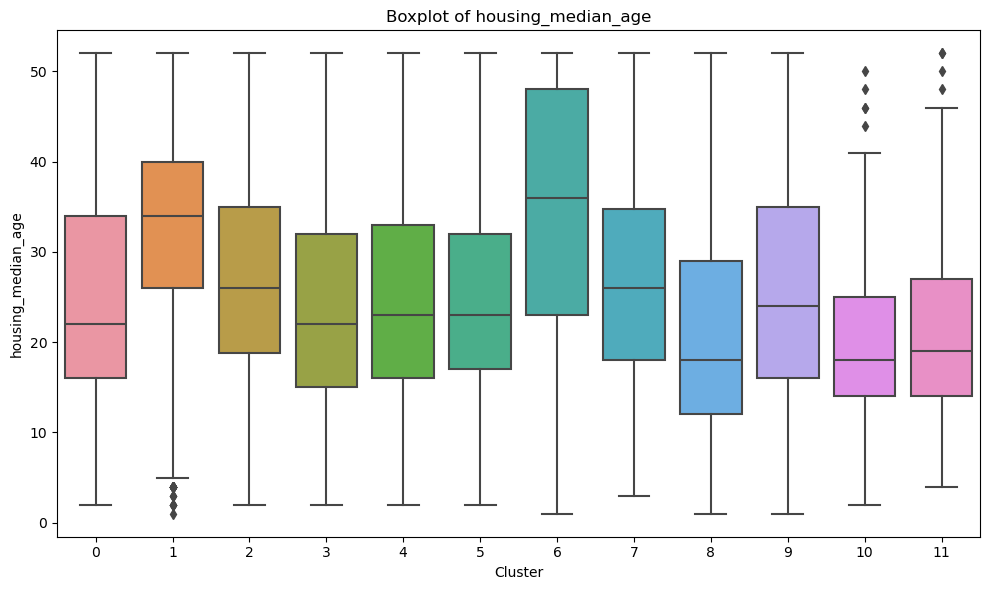

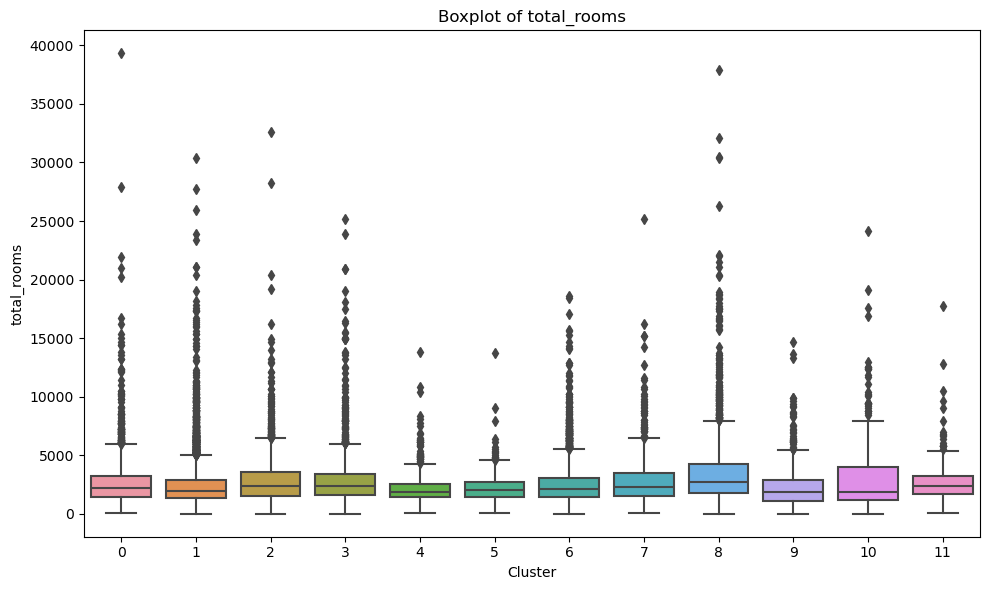

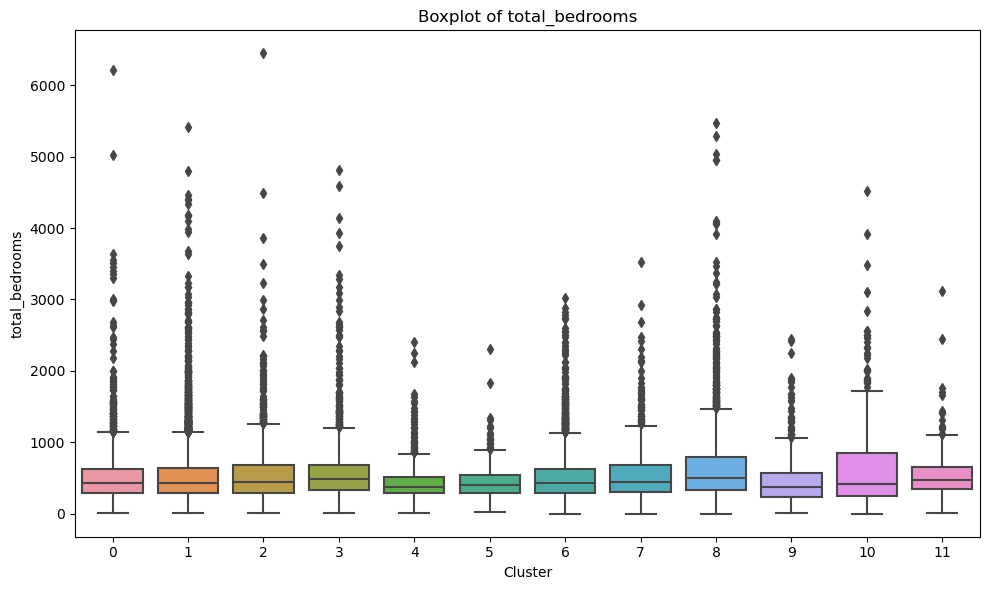

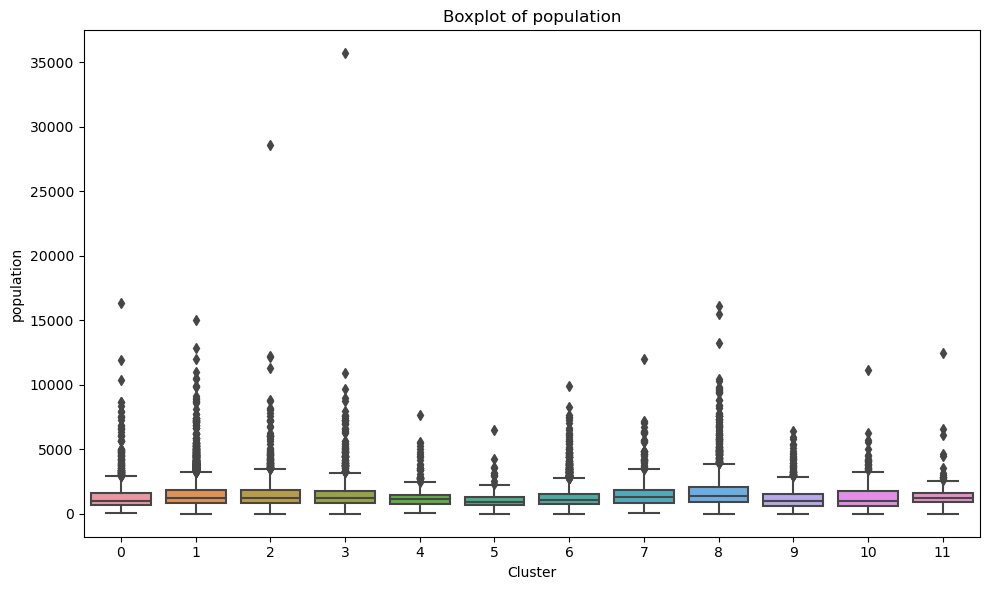

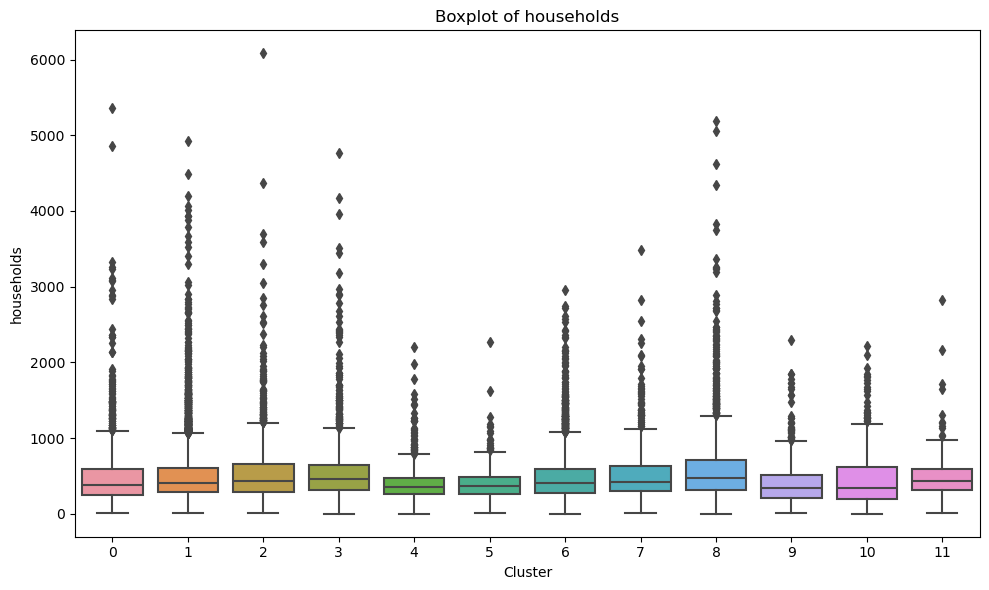

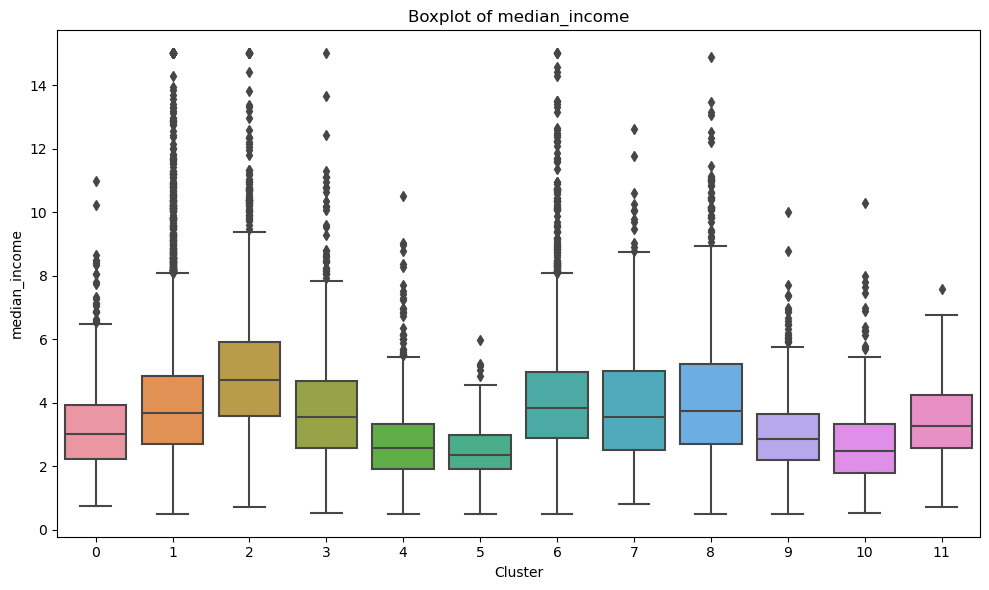

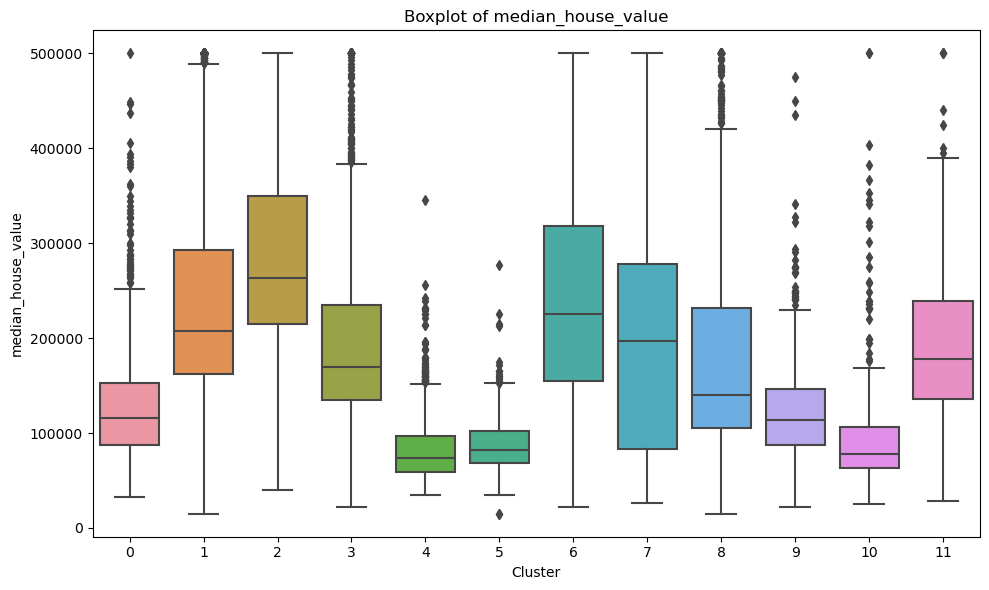

In [2]:

# Create DataFrame
housing_df = pd.DataFrame(california_housing)

# Selecting longitude and latitude columns
X = housing_df[['longitude', 'latitude']]

# Run k-means clustering with k=12
kmeans = KMeans(n_clusters=12, random_state=42)
housing_df['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot for longitude and latitude with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=housing_df, hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of High-income and High House Market Values in California (Sample Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Compare boxplots across clusters for each descriptive numerical variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i, var in enumerate(numerical_variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=var, data=housing_df)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


Observations: 
* I ran the algorithm multiple times with the same random seed, the results are consistent due to the deterministic nature of the algorithm. 
* However, changing the random seed or the initialization method led to different clustering, especially in datasets with overlapping or closely situated points.


2) Load CALIFORNIA-housing.csv and run a DBSCAN with eps=0.2 and min_samples=50 on the longitude and latitude columns. Create a scatter plot for longitude and latitude, coloring the nodes according to their class label. Compare boxplots across clusters for each descriptive numerical variable within the dataset. Run the algorithm multiple times and describe what you observe. Which differences to k-means do you observe? 

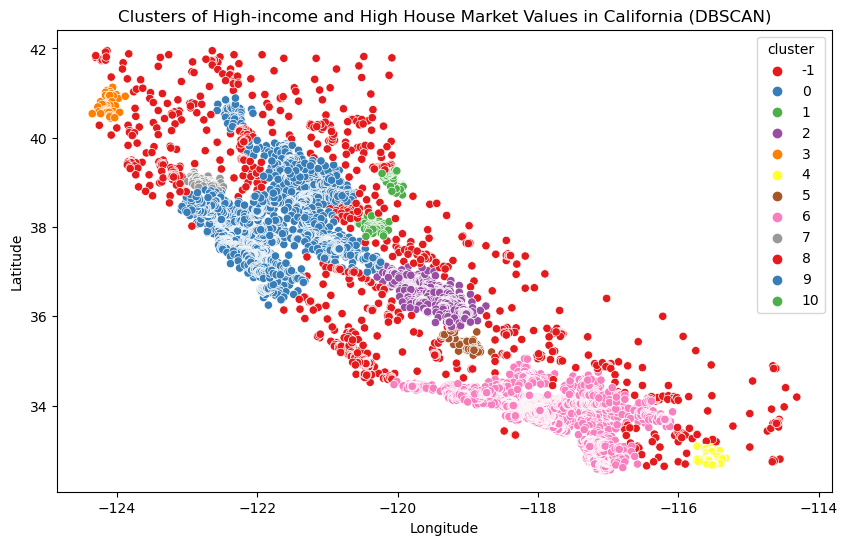

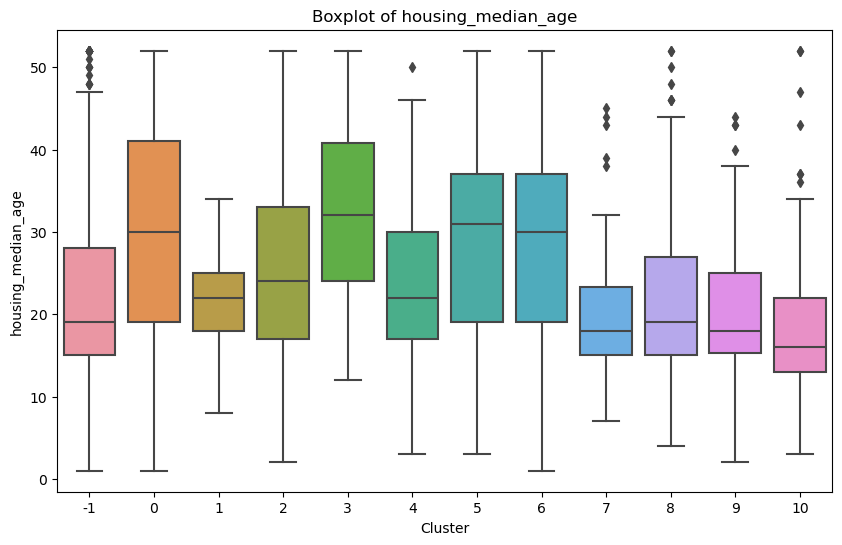

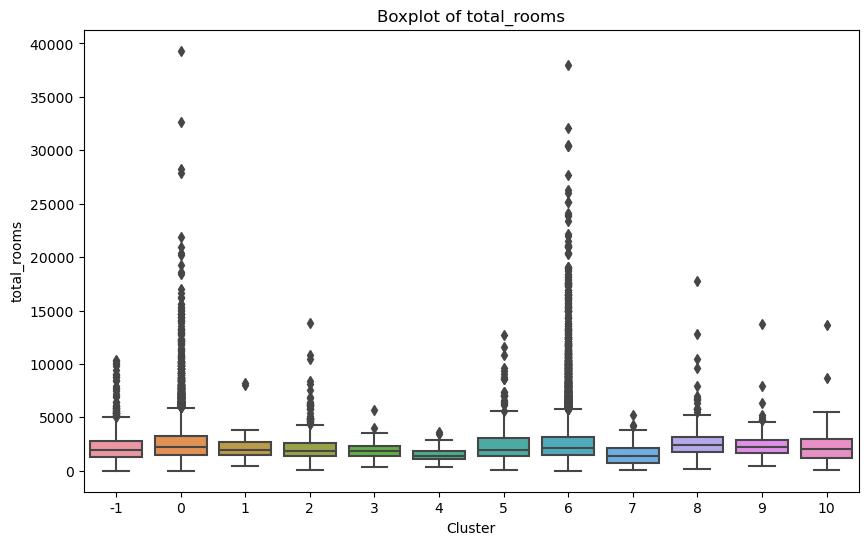

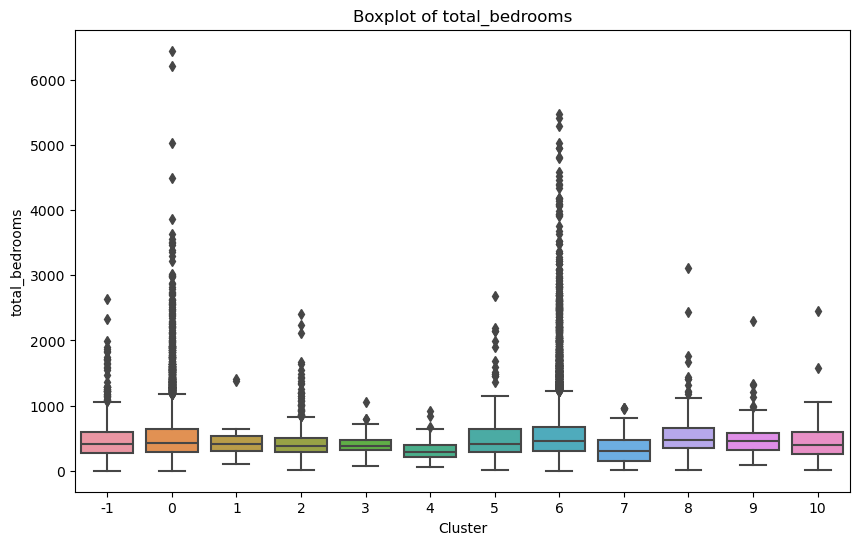

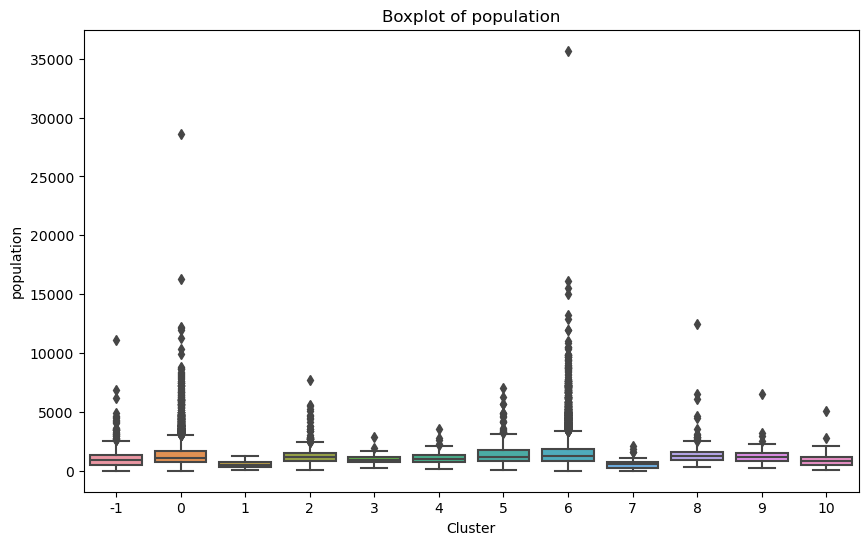

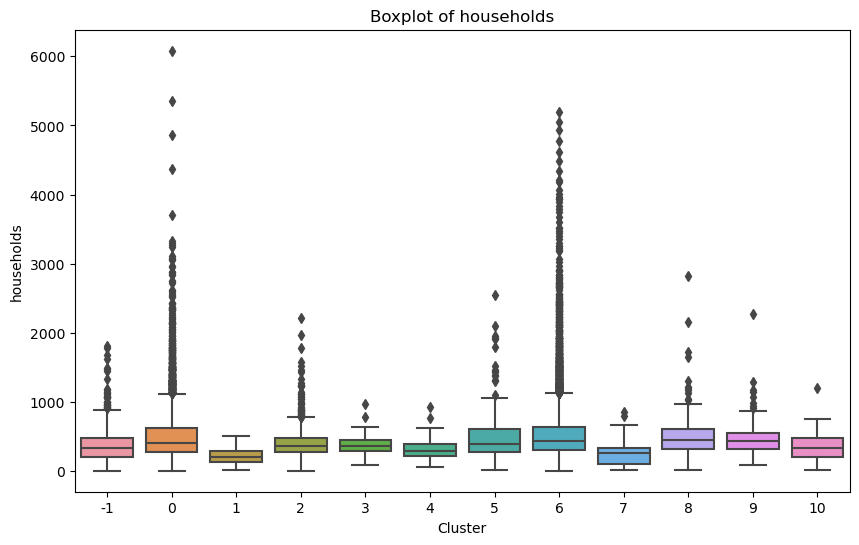

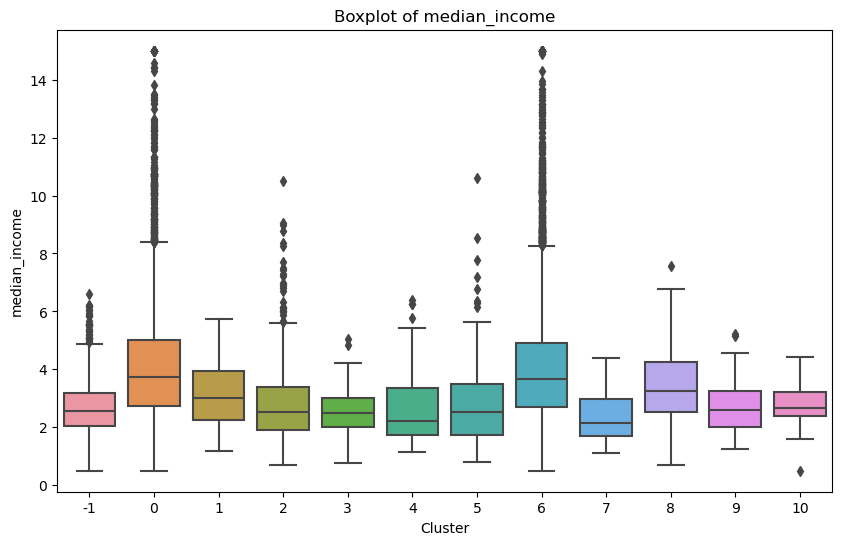

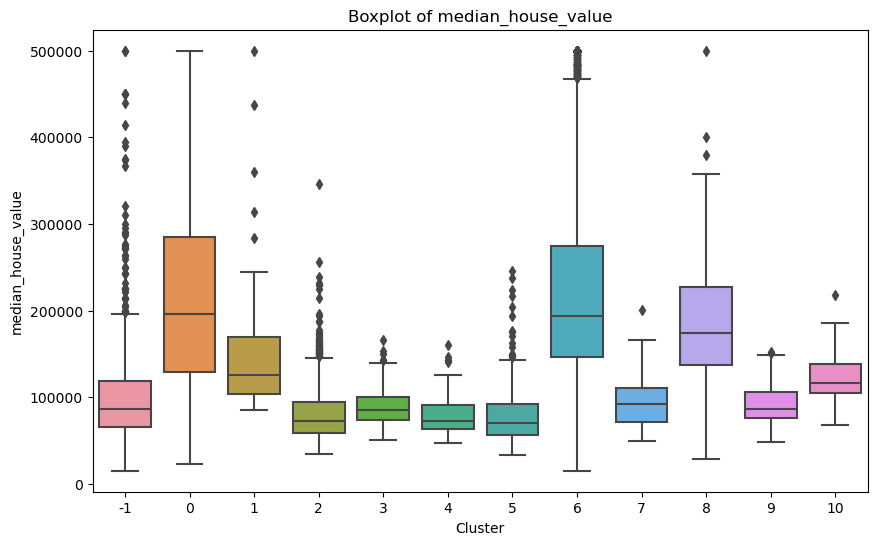

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

# Load the dataset
california_housing = pd.read_csv("./Files/CALIFORNIA-housing.csv")

# Drop any missing values
california_housing.dropna(inplace=True)

# Selecting longitude and latitude columns
X = california_housing[['longitude', 'latitude']]

# Run DBSCAN with eps=0.2 and min_samples=50
dbscan = DBSCAN(eps=0.2, min_samples=50)
california_housing['cluster'] = dbscan.fit_predict(X)

# Create a scatter plot for longitude and latitude with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=california_housing, hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of High-income and High House Market Values in California (DBSCAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Compare boxplots across clusters for each descriptive numerical variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i, var in enumerate(numerical_variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=var, data=california_housing)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.show()


Observations:

* DBSCAN results are consistent across multiple runs. K-means, on the other hand, produced different results in different runs due to random selection of initial centroids.

* DBSCAN identified and marked outliers as noise, which are data points that do not fit well into any cluster. K-means, conversely, assigned every point to a cluster, even if the point is an outlier or noise.

* DBSCAN found arbitrarily shaped clusters, while k-means generally identifies spherical clusters due to its reliance on centroid-based clustering.

* Both DBSCAN and k-means gave me same number of clusters.

* DBSCAN handled clusters of varying density, as it grouped the points that are closely packed while marking as outliers points that are alone in low-density regions. K-means did not handle varying densities well, as it tried to create clusters of similar sizes.



3) Load CALIFORNIA-housing.csv and run a k-means with k=4 on the median_income and median_house_value columns. Create a scatter plot for longitude and latitude, coloring the nodes according to their class label. Compare boxplots across clusters for each descriptive numerical variable within the dataset and describe what you observe in comparison to 3.1 and 3.2

/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


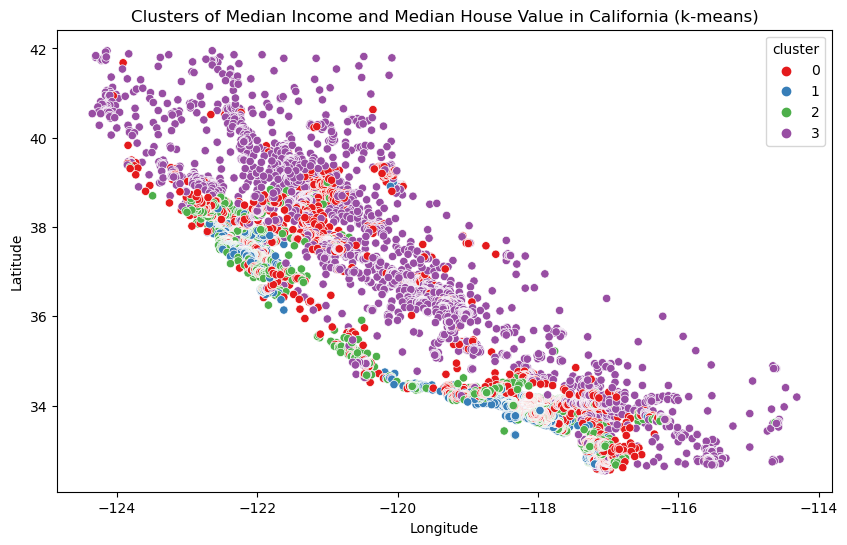

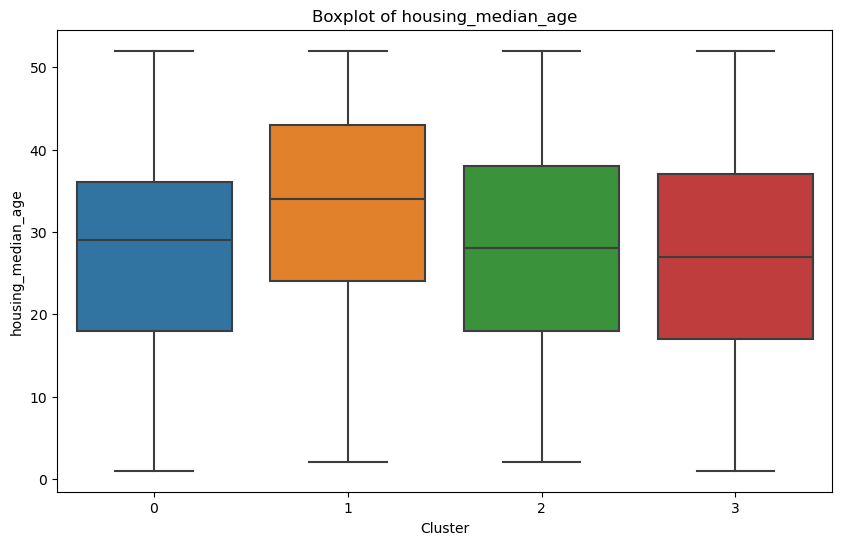

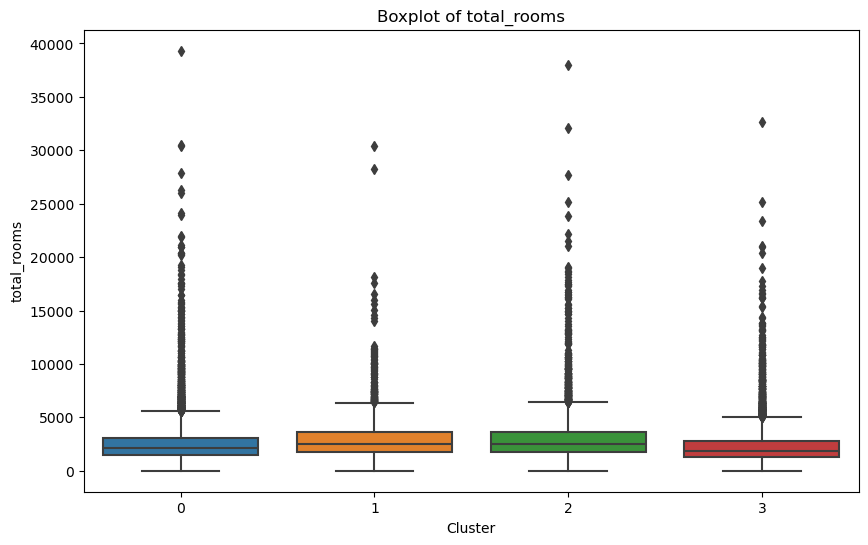

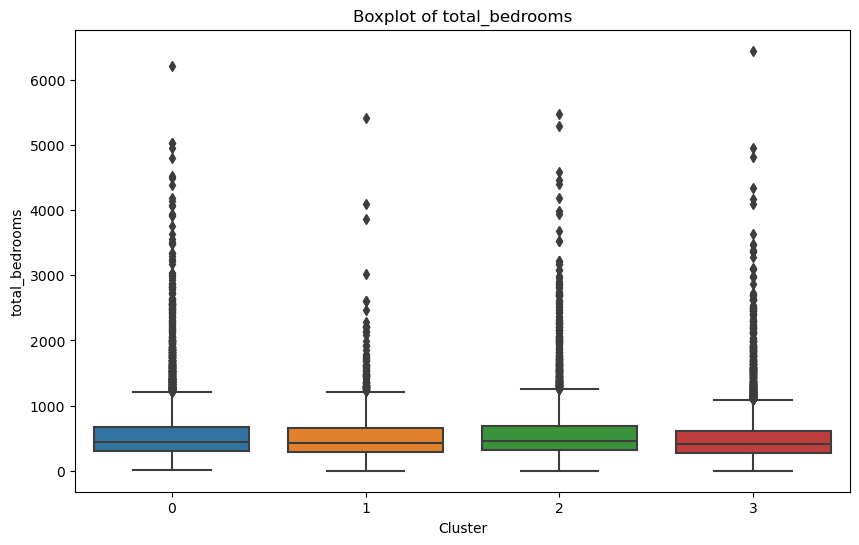

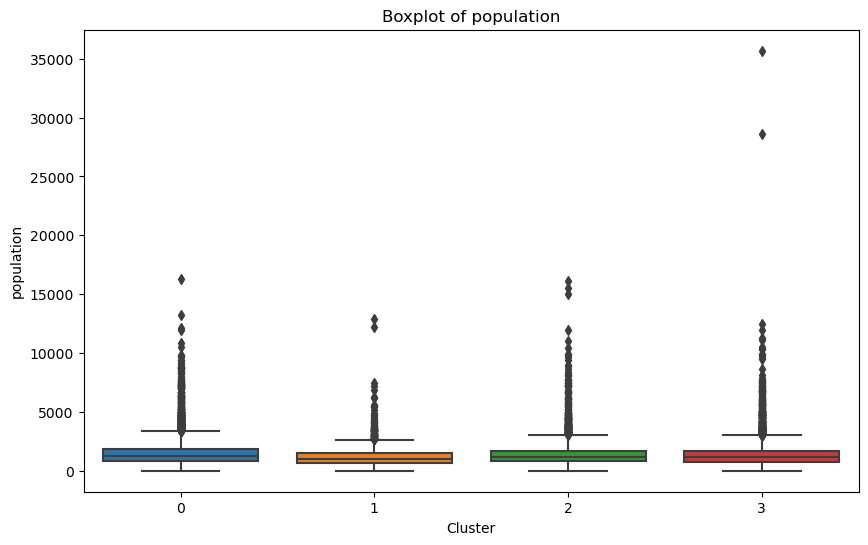

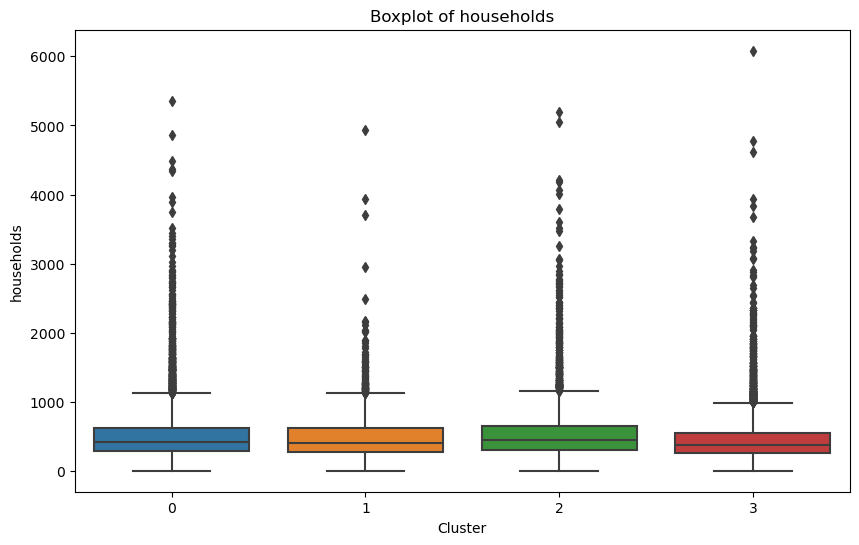

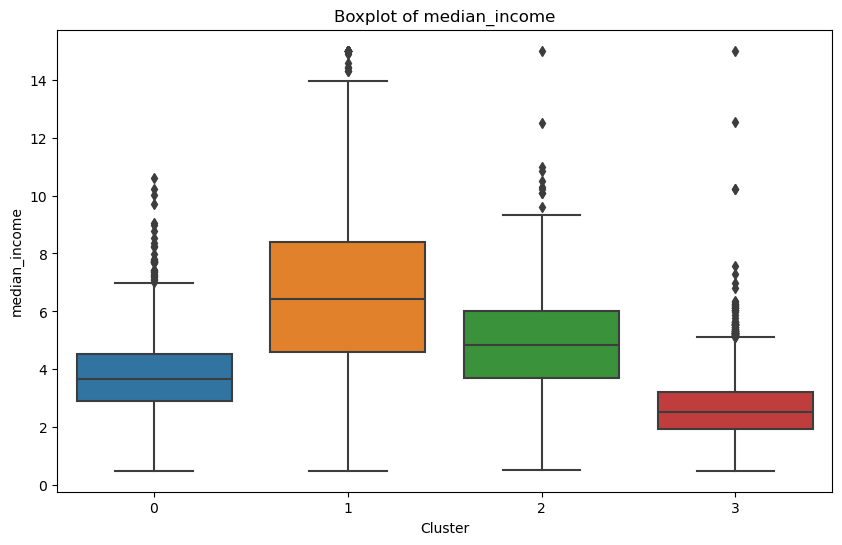

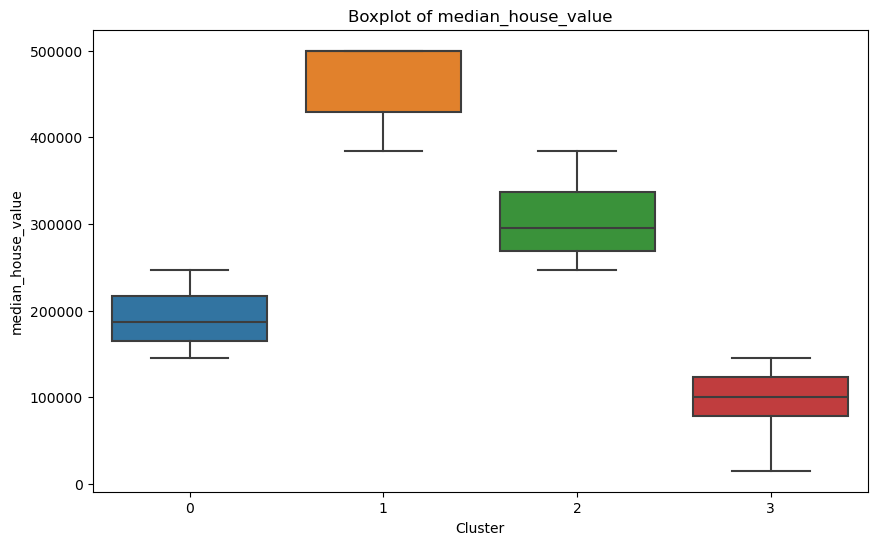

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load the dataset
california_housing = pd.read_csv("./Files/CALIFORNIA-housing.csv")

# Drop any missing values
california_housing.dropna(inplace=True)

# Selecting median_income and median_house_value columns
X = california_housing[['median_income', 'median_house_value']]

# Run k-means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
california_housing['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot for longitude and latitude with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=california_housing, hue='cluster', palette='Set1', legend='full')
plt.title('Clusters of Median Income and Median House Value in California (k-means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Compare boxplots across clusters for each descriptive numerical variable
numerical_variables = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for i, var in enumerate(numerical_variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=var, data=california_housing)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.show()


For Box Plot of Housing Median Age

* K-means with 12 clusters breaks down the houses into more specific age categories. It's like having a more detailed list of neighborhood types based on house age, with each group being more distinct.

* DBSCAN creates several groups and also shows some houses that don't quite fit into any category (labeled as '-1'). The groups overlap a bit, so they're not as clearly different from each other as in the k-means with 4 clusters.

* K-means with 4 clusters shows four groups that are quite different from each other. It's like having four broad categories of neighborhoods based on the age of the houses.

For Box Plot of total rooms
 
* K-means with k=12: Here, the clusters are spread out more than in k=4, which means we're looking at more specific groups of houses. Just like in the k=4 image, some clusters have houses with a lot more rooms than others

* DBSCAN: This one has a special category for outliers (the '-1' cluster), which is the cluster with very wide variation, showing it's a mix of different types of houses. The other clusters are pretty tight groups, meaning that houses in each cluster are more similar to each other in terms of room numbers.

* K-means with k=4: The clusters are quite compact, with fewer rooms on average, but there are some houses with many more rooms than most (the dots far above the boxes are these larger houses). This is a broad brush look, dividing houses into just a few big groups.


For Box Plot of total bedrooms
* K-means with k=12: There are many clusters, but they all have a similar spread—most houses have a low to moderate number of bedrooms, but there are a few houses with lots more. It's a fine-tuned picture with many small groups.

* DBSCAN: This method also identifies a noise category (the '-1' cluster), which has a wider spread, showing some very different houses from the rest. The other clusters are narrow, so houses in each group are quite alike in bedroom count.

* K-means with k=4: Fewer clusters mean broader categories. Most houses have a similar number of bedrooms, but there are still some with a lot more, similar to the k=12 setup, just less detailed.

For Box Plot of population sizes

* K-means with k=12: Clusters vary widely in population size. Some have few people, and some have many, but each cluster has outliers—places with a much higher population than the rest in that cluster.

* DBSCAN: Again, there's a cluster for outliers ('-1'), with a few areas having a very large population. Other clusters have a more uniform population size, with a few exceptions here and there.

* K-means with k=4: There are four broad categories, each with a range of population sizes, but this time they are more spread out. Each cluster has areas with particularly high populations compared to the rest.

For Box Plot of number of households

* K-means with k=12: We have a lot of clusters, and they're a bit scattered. Most clusters have a few households with a lot more than others. This gives us a detailed view, with small, distinct groups.

* DBSCAN: There's a special cluster for the outliers (-1), which shows us areas with a particularly high number of households that don't fit into regular clusters. The other clusters are more consistent, showing that households in each group are pretty similar.

* K-means with k=4: This time, we have fewer, larger clusters. They show a variety of household numbers, with each cluster having some areas with many more households than the rest.

For Box Plot of median income across

* K-means with k=12: Each cluster has a range of incomes, but there’s a lot of variation within them. Some clusters tend to have higher incomes overall, while others are on the lower end. There are a few outliers in nearly every cluster, which means some areas have incomes that are much higher or lower than the rest in their group.

* DBSCAN: The cluster labeled '-1' includes areas that didn’t fit well into any cluster and shows a wide range of incomes. The other clusters are more uniform, with less variation within each group compared to k-means with k=12.

* K-means with k=4: The clusters are broader here, each encompassing a wide range of incomes. However, like with k=12, there are outliers—areas that stand out because their incomes are much different from others in the same cluster.

For Box Plot of median house values

* K-means with k=12: The clusters here show a wide range of house values. Some clusters have a tight grouping around a certain value range, while others are more spread out. There are also quite a few outliers, indicating some houses are valued much higher or lower than most in their cluster.

* DBSCAN: The '-1' cluster represents outliers or homes that didn't fit into other clusters, and here we see a great variety in house values. The rest of the clusters seem to be more uniform, indicating that DBSCAN creates groups with more similar house values.

* K-means with k=4: Fewer clusters mean we get a broader overview. Each cluster has a mix of house values, but with clear distinctions between each cluster’s range. Like the others, there are a few outliers showing homes that are exceptions.

low-budget marketing campaign for an independent movie in Berlin, Germany is looking for an optimal subway station to put up advertisements. Please help the movie makers reach as many people as possible.

4) Load BERLIN-stations.csv and BERLIN-connections.csv, and use networkx to create a graph based on the stations and connections. Populate the graph using for loops: first across stations to add nodes (with positions set to longitude and latitude) and then across connections to add edges. Then plot the graph based on node position. Then plot as a circular graph. Then plot as kamada kawai graph. Then plot its adjacency matrix. Discuss the differences you see in the plots.

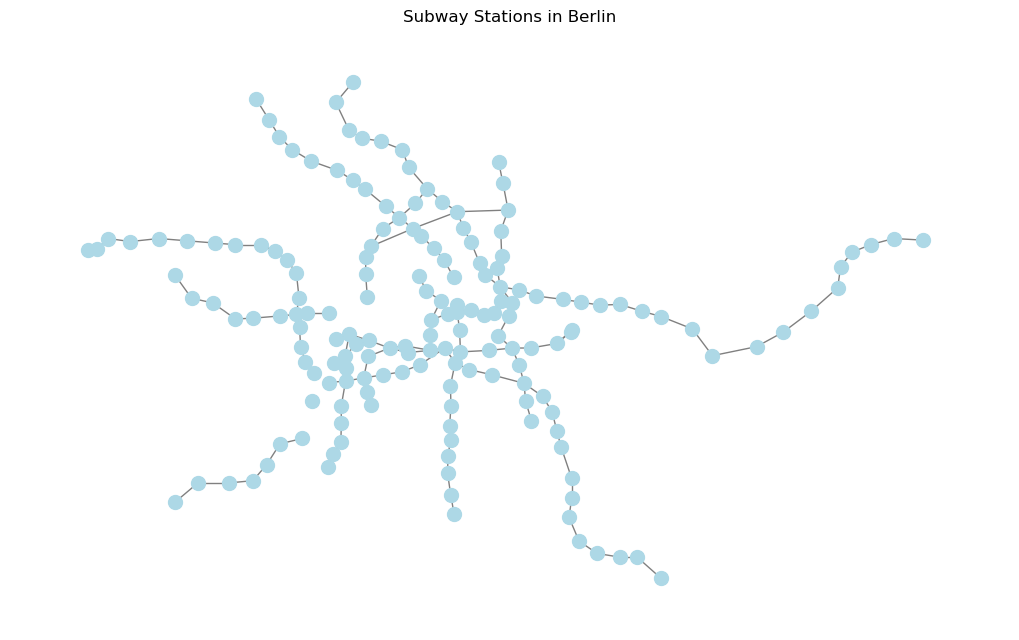

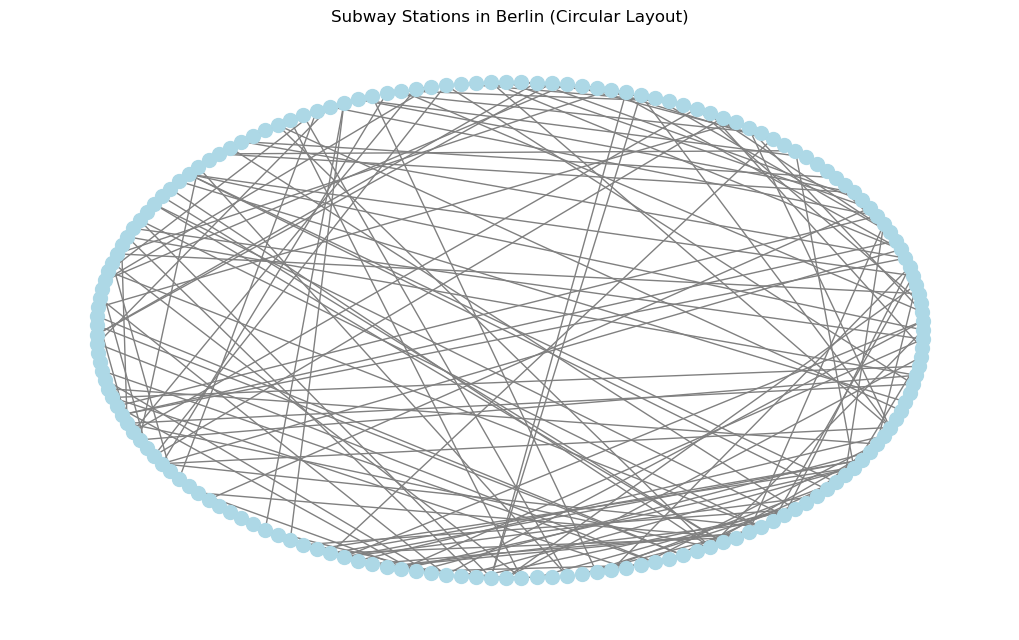

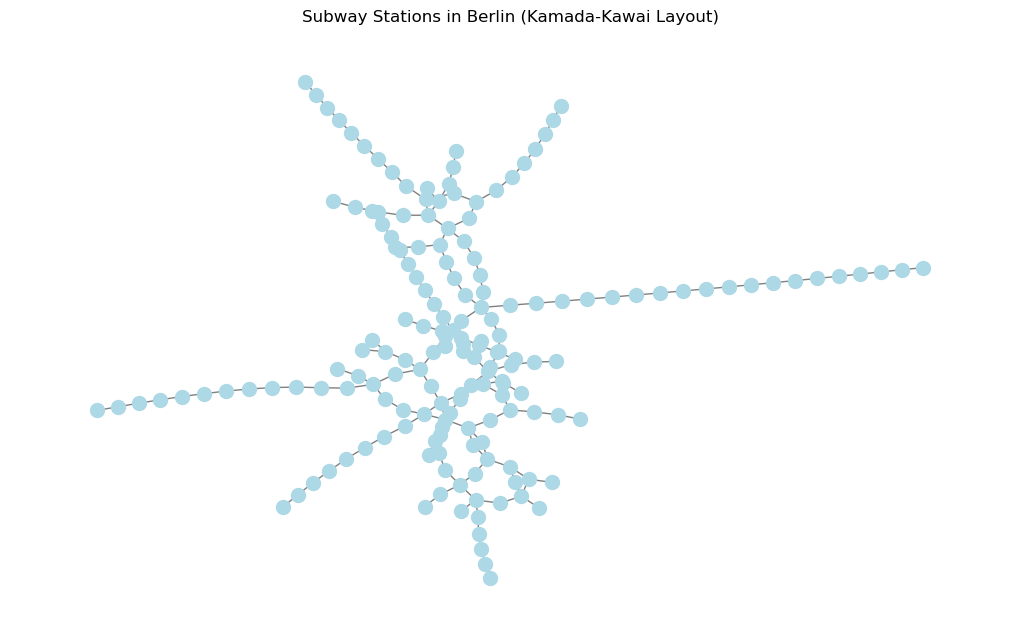

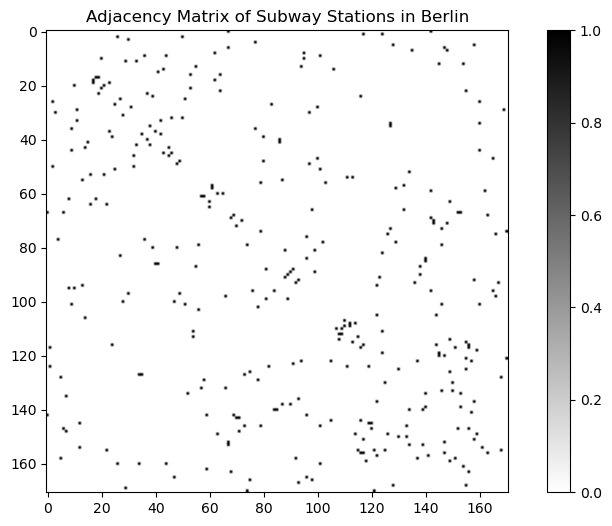

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the stations and connections data
stations_df = pd.read_csv('./Files/BERLIN-stations.csv')
connections_df = pd.read_csv('./Files/BERLIN-connections.csv')

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for index, row in stations_df.iterrows():
    G.add_node(row['name'], pos=(row['longitude'], row['latitude']))

# Add edges to the graph
for index, row in connections_df.iterrows():
    if row['station'] in G.nodes and row['adjacent'] in G.nodes:
        G.add_edge(row['station'], row['adjacent'])

# Plot the graph based on node position
plt.figure(figsize=(10, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Subway Stations in Berlin')
plt.show()

# Plot the graph as a circular graph
plt.figure(figsize=(10, 6))
nx.draw_circular(G, with_labels=False, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Subway Stations in Berlin (Circular Layout)')
plt.show()

# Plot the graph as a Kamada-Kawai graph
plt.figure(figsize=(10, 6))
nx.draw_kamada_kawai(G, with_labels=False, node_size=100, node_color='lightblue', edge_color='gray')
plt.title('Subway Stations in Berlin (Kamada-Kawai Layout)')
plt.show()

# Plot the adjacency matrix of the graph
plt.figure(figsize=(10, 6))
adj_matrix = nx.to_numpy_array(G)
plt.imshow(adj_matrix, cmap='binary')
plt.title('Adjacency Matrix of Subway Stations in Berlin')
plt.colorbar()
plt.show()


In [22]:
import networkx as nx

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
highest_degree_node = max(degree_centrality, key=degree_centrality.get)

# Calculate average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)

# Calculate transitivity
transitivity = nx.transitivity(G)

# Calculate graph density
graph_density = nx.density(G)

# Calculate number of modules and nodes in each module
modules = list(nx.connected_components(G))
num_modules = len(modules)
nodes_per_module = [len(module) for module in modules]

# Calculate average clustering coefficient and small worldness of modules with more than 50 nodes
large_modules = [module for module in modules if len(module) > 50]
average_clustering_coefficient_large_modules = [nx.average_clustering(G.subgraph(module)) for module in large_modules]
small_worldness_large_modules = [nx.smallworld.sigma(G.subgraph(module)) for module in large_modules]

# Print the results
print("Node with highest betweenness centrality:", highest_betweenness_node)
print("Node with highest degree centrality:", highest_degree_node)
print("Average clustering coefficient:", average_clustering_coefficient)
print("Transitivity score:", transitivity)
print("Graph density:", graph_density)
print("Number of modules:", num_modules)
print("Nodes per module:", nodes_per_module)
print("Average clustering coefficient of large modules:", average_clustering_coefficient_large_modules)
print("Small worldness of large modules:", small_worldness_large_modules)


Node with highest betweenness centrality: Bahnhof Berlin-Alexanderplatz
Node with highest degree centrality: Bahnhof Berlin-Alexanderplatz
Average clustering coefficient: 0.0029239766081871343
Transitivity score: 0.012396694214876033
Graph density: 0.012108703130374958
Number of modules: 6
Nodes per module: [137, 7, 24, 1, 1, 1]
Average clustering coefficient of large modules: [0.0036496350364963502]
Small worldness of large modules: [1.4812339212459733]
